In [1]:
import pandas as pd
import requests 
from pymongo import MongoClient
import pymongo

In [3]:
dataset= pd.read_csv('Data_api.csv')

/var/folders/km/68mt9rpj51l1_17_mt8jfwg00000gn/T/ipykernel_93640/3404573704.py:1: DtypeWarning: Columns (0,1,2,4,6,8,9,10,14,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset= pd.read_csv('Data_api.csv')


In [65]:
dataset.columns

Index(['Smart_contract', 'ID_token', 'Transaction_hash', 'Seller_address',
       'Seller_username', 'Buyer_address', 'Buyer_username', 'Image_url_1',
       'Image_url_2', 'Image_url_3', 'Image_url_4', 'Price_Crypto', 'Crypto',
       'Price_USD', 'Name', 'Description', 'Collection', 'Market',
       'Datetime_updated', 'Datetime_updated_seconds', 'Permanent_link',
       'Unique_id_collection', 'Collection_cleaned', 'Category'],
      dtype='object')

In [8]:
client = MongoClient()
db = client.LitNFTDB
collection_data = db.rawCollection

In [9]:
collection_data.insert_many(dataset.to_dict('records'))

In [ ]:
import re
rex = re.compile('.*2021-05.*',re.IGNORECASE)

high_vals = collection_data.find({"Price_Crypto": {"$gt": 2},"Market":'OpenSea','Crypto': 'ETH'})
slugs  = set()
for val in high_vals:
    slugs.add(val['Collection'])
slug_to_count = {}
for el in slugs:
    slug_to_count[el] = collection_data.count_documents({"Collection":el})
print(slugs)

In [ ]:
sort_slugs = dict(sorted(slug_to_count.items(), key=lambda item: item[1]))
print(sort_slugs)

In [11]:
collection_data.create_index( [('buyer_address', pymongo.ASCENDING)] )

'buyer_address_1'

In [ ]:
db.collection.find({{"Price_Crypto": {"$gt": 1}}})

In [1]:
from pymongo import MongoClient
client = MongoClient()
db = client.NFTDB
slug_data = db.completedSlugs
collection_data = db.salesCollection
# print(list(collection_data.find({'slug':'meowlady-maker'})))
print(slug_data.count_documents({}))
# print(list(slug_data.find({})))
print(collection_data.count_documents({}))
print(collection_data.find_one({"timestamp" : {"$regex" : "2020-02"}}))
print(len(set(collection_data.distinct('buyer_address')+collection_data.distinct('seller_address'))))
db.command("dbstats")

641
3121367
None


OperationFailure: Executor error during distinct command :: caused by :: distinct too big, 16mb cap, full error: {'ok': 0.0, 'errmsg': 'Executor error during distinct command :: caused by :: distinct too big, 16mb cap', 'code': 17217, 'codeName': 'Location17217'}

In [84]:
from pymongo import MongoClient
client = MongoClient()
db =client.NFTDB
slug_data = db.completedSlugs
transfer_slug = db.completedSlugsTransfers
sales = db.salesCollection
transfers = db.transferCollection
NFTs = db.addresstoNFT
print(sales.count_documents({}))
print(transfers.count_documents({'Sale':{ '$exists' : False }}))
print(slug_data.count_documents({}))
print(transfer_slug.count_documents({}))
print(len(set(sales.distinct('buyer_address')+sales.distinct('seller_address'))))
print(len(set(transfers.distinct('buyer_address')+transfers.distinct('seller_address'))))
print(NFTs.count_documents({}))
# docs = NFTs.find({})
# for doc in docs:
#     print(len(doc['NFTs']))

# wallets = list(wallets)
# print(len(wallets))
# print(len(list(wallets2)))

591437
533652
77
77
152959
201122
152638


In [114]:
from tqdm import tqdm
addresses = list(set(collection_data1.distinct('buyer_address')+collection_data1.distinct('seller_address')))
trans_hist_orig = []
trans_hist_new = []
transfer_hist = []
address_to_trans = {}
zeros=0
for wallet in tqdm(wallets):
    address = wallet['_id']
# for address in tqdm(addresses):
    num_trans = collection_data1.count_documents({'seller_address':address})+collection_data1.count_documents({'buyer_address':address})
    trans_hist_orig.append(num_trans)
    num_trans = collection_data2.count_documents({'seller_address':address,'event_type':'successful'})+collection_data2.count_documents({'buyer_address':address,'event_type':'successful'})
    if num_trans==0:
        zeros+=1
    trans_hist_new.append(num_trans)
    num_trans = collection_data2.count_documents({'seller_address':address,'event_type':'transfer'})+collection_data2.count_documents({'buyer_address':address,'event_type':'transfer'})
    transfer_hist.append(num_trans)
# address_to_trans[address] = num_trans
print(zeros)
print(trans_hist_orig)
print(trans_hist_new)
print(transfer_hist)
# trans_hist_new = [x+1 if x==0 else x for x in trans_hist_new]

100%|██████████| 99/99 [00:01<00:00, 89.95it/s]

83
[1, 1, 1, 5, 4, 2, 3, 5, 6, 9, 1, 2, 2, 3, 2, 1, 1, 1, 2, 3, 2, 3, 4, 1, 1, 1, 1, 1, 1, 1, 4, 3, 3, 2, 1, 1, 1, 3, 1, 1, 3, 1, 9, 2, 4, 1, 1, 3, 1, 4, 1, 4, 1, 5, 1, 2, 1, 1, 4, 1, 7, 1, 1, 2, 5, 3, 1, 1, 2, 6, 5, 1, 1, 3, 1, 1, 1, 5, 2, 3, 1, 1, 2, 1, 1, 3, 1, 6, 5, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 2, 0, 0, 19, 1, 2, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 13, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[5, 3, 16, 12, 48, 119, 123, 40, 28, 435, 10, 68, 5, 50, 2, 1, 28, 27, 9, 3, 17, 43, 10, 2, 5, 15, 1, 115, 12, 3, 5, 44, 3, 39, 26, 21, 17, 7, 10, 49, 15, 4, 6, 107, 116, 11, 19, 30, 2, 152, 24, 28, 36, 7, 2, 3, 2, 2, 19, 4, 320, 74, 57, 3, 29, 340, 3, 3, 17, 16, 84, 8, 3, 345, 105, 13, 59, 2, 27, 26, 51, 2, 4, 6, 2, 13, 8, 5, 6, 21, 0, 4, 4, 17, 29, 11, 1, 19, 9]


<ipython-input-115-45c4fef1c18f>:5: RuntimeWarning: divide by zero encountered in log10
  g2 = sns.ecdfplot(data = np.log10(transfer_hist), label = "Total Transactions")


[Text(0.5, 0, 'Log Number of Transactions'),
 Text(0, 0.5, 'Density'),
 Text(0.5, 1.0, 'ECDFs for 100 randomly chosen wallets')]

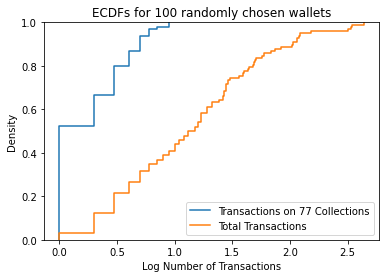

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
g = sns.ecdfplot(data = np.log10(trans_hist_orig), label = "Transactions on 77 Collections")
g2 = sns.ecdfplot(data = np.log10(transfer_hist), label = "Total Transactions")
# g = sns.kdeplot(data = np.log10(trans_hist), cumulative = True, label = "X1")
# g.set_xticklabels(['0.1','1','10','100','1000','100000'])
g.legend()
g.set(xlabel='Log Number of Transactions', ylabel='Density',title="ECDFs for 100 randomly chosen wallets")
# g = sns.ecdfplot(data = np.log10(trans_hist), label = "X1")
# g2.set_xticklabels(['0.1','1','10','100','1000','100000'])

In [22]:
from pymongo import MongoClient, DESCENDING
collection_data.create_index("buyer_address")

'buyer_address_1'

In [37]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.36ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [158]:
for key,value in address_to_trans.items():
    if value>1000:
        print(value,key)
sum(i > 1000 for i in trans_hist)

2417 0xf408bee3443d0397e2c1cde588fb060ac657006f
2894 0xc58d63d59ad68930c9fdff6f1ac479c5c9941ef4
1182 0x856750961732cbead1e289e04c57027bb368fcc0
2340 0xe3d3d0ed702504e19825f44bc6542ff2ec45cb9a
2802 0x385ce35599ae5e6f0eaf0f69841fffa9f41acdd5
1418 0x196f239229aae65883802b5bb512e17084147ff6
1383 0xb26b5d90c8961a779efc8d8ad881b128dd8385eb
4491 0x020ca66c30bec2c4fe3861a94e4db4a498a35872
1734 0x5f1ee29361206f1a129e808736f11598356c6031
3937 0x63e0605491bda6e4c1c37cf818a45b836faf46ee
2674 0xcbb0fe555f61d23427740984325b4583a4a34c82
1616 0x1e9b0ce14b52a94e102ddf8a5bd9421b3502c10c
2413 0x97c7d94d01bcbc41b80ef7cc8c5bebc3d11c6a20
1157 0x13422774d8416a316390f5aa2e713c5742592aaf
2155 0x49fabee6cadf2dd5bf738f9c0dfabbb2c8fd6a81
2552 0xed2ab4948ba6a909a7751dec4f34f303eb8c7236
1277 0xc5775840ce050f12a1e52533dae1b67b2dc6cc50
2593 0xc4da1707a7a16cf4ac15d75d6a49a684b23ee1e4
1468 0xa7b9c7cb5dfaf482ce2d3166b955e685e080cbbc
26681 0x29469395eaf6f95920e59f858042f0e28d98a20b
8138 0x77e3e957082ca648c1c5b0f3e6aec00a

31

In [146]:
user_names = []
for address in addresses:
    if address_to_trans[address]>=10 and address_to_trans[address]>2:
        record = collection_data.find_one({'buyer_address':address})
        if record is None:
            record = collection_data.find_one({'seller_address':address})
            if record is not None:
                user_name = record['seller_username']
        else:
            user_name = record['buyer_username']
        user_names.append(user_name)
    

In [147]:
sum(i is None for i in user_names)/len(user_names)

0.38525535007267075

In [52]:
from tqdm import tqdm
import pandas as pd
db =client.NFTDB
sales = db.salesCollection
record = sales.find({})
df = pd.DataFrame.from_records(record)

# for address in tqdm(addresses):
#     record = list(collection_data.find({'seller_address':address}))+list(collection_data.find({'buyer_address':address}))
#     df = pd.DataFrame.from_records(record)
#     df['timestamp'] = pd.to_datetime(df['timestamp'])
#     df_group = df.groupby([df['timestamp'].dt.date,df['timestamp'].dt.second]).count()
#     collisions = max(df_group['_id'])
#     if collisions>10:
#         print(collisions)

In [53]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.sort_values(by='timestamp', inplace = True)

In [54]:
df['seconds'] = df['timestamp'].astype(int)

In [55]:
df['time_gap'] = df['seconds'].diff()

In [56]:
df_sec_sort = df.sort_values(by='time_gap')

In [57]:
df

,_id,auction_type,buyer_address,buyer_username,event_type,is_bundle,payment_token,seller_address,seller_username,slug,timestamp,token_id,total_price,usd_price,seconds,time_gap
199545,0x439f8e8ae7b45ff020e1dbbf197efe0b77db7ebd6adf...,None,0x7deee0b8aa6d3fc99881e1df461fe51bf2c8108d,None,successful,False,WETH,0xd3efe22206cb34952da49f69630858a0ccd16209,None,renga,2023-01-01 12:05:23,9802,1.400000,1634.41,1672574723000000000,NaN
248746,0xcfddd9628bdfd8c1e39cffd74c244b9af99c5c834a47...,None,0x669a8cdce1eaddf94456be50348188b29c03b53c,fmtjetlag,successful,False,ETH,0x1e73e1b8cd1712db0641342cd8167346a21530be,None,thepotatoz,2023-01-01 12:07:35,6628,2.865000,1636.28,1672574855000000000,1.320000e+11
183492,0xf9d94d219257438962b63601d6e12566111046ef1c99...,None,0xba26877c2036e1f2baba63bdd5bfe996b050e13c,agujero_negro,successful,False,WETH,0x534d1a3374c966502e25d1d5d1e0ba9b5bd67c37,None,impostors-genesis-aliens,2023-01-01 12:16:11,4520,0.300000,1633.93,1672575371000000000,5.160000e+11
364443,0x0eb47bf92535dc62e2d993017d62d4538114542a1d5b...,None,0x2d19e2e80db164a08be52e8a0f1c57e3e7425ee8,None,successful,False,WETH,0xbfa2db07d132c130e2848a823d6d53a1657d61f9,None,azuki,2023-01-01 12:22:11,4055,12.950000,1634.78,1672575731000000000,3.600000e+11
364442,0x88c00de1553826ae0421057bbd2ee092d6efbeb66472...,None,0x22caaeee9f2e34cf68cb1ef54846d518d35c668c,None,successful,False,WETH,0xc6fc07eb943b86d1972a3bdeda119d04fe8c7c12,None,azuki,2023-01-01 12:22:59,8620,12.930000,1634.78,1672575779000000000,4.800000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554539,0x192a966a5fa0774c655fbcd58ea2cd798d3ca9b0eed5...,None,0xfa463f7606315319098b11a9567102421c432001,Elpsylo,successful,False,ETH,0x622a5b6c4e544a4c085745c4b147d995bb235bbe,None,akidcalledbeast,2023-09-04 20:52:23,662,0.223491,1623.87,1693860743000000000,1.368000e+12
554538,0xe2822efcd2a90db2701c380b7c5091cbd80a6c7ec73a...,None,0x90b74ef7bc1975bcb1c67450c7b1575922b67e54,None,successful,False,WETH,0xeb745ce75c877ec975d4cad81d54270e46aec33b,skrptd,akidcalledbeast,2023-09-04 20:53:59,3060,0.200000,1627.78,1693860839000000000,9.600000e+10
585367,0x93dc35b04f993e9f47b73f244508553be8494cdd5a38...,None,0xe3d3d0ed702504e19825f44bc6542ff2ec45cb9a,None,successful,False,ETH,0x89177787e8b88b6b95cfcd0501e79bdd05d370ca,MickeyFantom_2969,sproto-gremlins,2023-09-04 21:05:59,1859,0.990000,1621.49,1693861559000000000,7.200000e+11
578863,0xeec42b6d640be04908c30506832bcd4aa84e13c58e3d...,None,0x1847077fdb5bae66a836334a7b0fa02b15b8ae66,Jud,successful,False,ETH,0x83e90475dbc318444620cc09491d37ec29746723,Muazbxr,veefriends-series-2,2023-09-04 21:07:47,54329,0.127000,1621.49,1693861667000000000,1.080000e+11


In [58]:
df_buy = pd.DataFrame()
df_sell = pd.DataFrame()
df_buy['address'] = df['buyer_address']
df_buy['timestamp'] = df['timestamp']
df_sell['address'] = df['seller_address']
df_sell['timestamp'] = df['timestamp']
df_merged = pd.merge(df_buy,df_sell)
addresses = df_merged['address'].unique()

In [63]:
count = []
peeps = 0
user_names = []
bot_addy = []
for address in tqdm(addresses):
    trans = len(list(sales.find({'seller_address':address}))+list(sales.find({'buyer_address':address})))
    if trans>10:
        record = sales.find_one({'buyer_address':address})
        if record is None:
            record = sales.find_one({'seller_address':address})
            if record is not None:
                user_name = record['seller_username']
        else:
            user_name = record['buyer_username']
        user_names.append(user_name)
        peeps+=1
        count.append(trans)
        bot_addy.append(address)
print(sum(count))
print(peeps)
print(sum(i is None for i in user_names)/len(user_names))
print(len(bot_addy))

100%|██████████| 310/310 [00:01<00:00, 298.05it/s]

131042
292
0.5034246575342466
292


In [64]:
pot_bots = db.BotAddresses
for addy in bot_addy:
    pot_bots.insert_one({'_id':addy})

In [41]:
from pymongo import MongoClient
client = MongoClient()
db =client.NFTDB
slug_data = db.completedSlugs
transfer_slug = db.completedSlugsTransfers
sales = db.salesCollection
transfers = db.transferCollection
print(transfers.find_one({'buyer_address':'0xf849de01b080adc3a814fabe1e2087475cf2e354'}))

{'_id': '0xdb21fab0df0505b4d73b69d9e8c7f69b7324e841cdbabfbd689c02cf6b86addb', 'auction_type': None, 'buyer_address': '0xf849de01b080adc3a814fabe1e2087475cf2e354', 'buyer_username': None, 'event_type': 'transfer', 'is_bundle': False, 'seller_address': '0x14751dacba0a081eecdc887ef065f8533c40ab90', 'seller_username': None, 'slug': 'atsnft', 'timestamp': '2023-07-23T23:14:35', 'token_id': '3720'}


In [42]:
from pymongo import MongoClient
client = MongoClient()
db =client.TestDB
test_coll = db.listtest
test_dict = {'_id':'1','list_test':['1','2','3']}
test_coll.insert_one(test_dict)

In [44]:
len(test_coll.find_one({})['list_test'])

3